In [6]:
"""
Exp07A: Notional-scaled cost (transaction cost sweep)

Goal:
- Test how much capital can this strategy realistically deploy under realistic execution conditions?how transaction costs erode performance and identify the break-even cost level.

把 COST_RATE 视为资本规模的 proxy
即：更大的资金规模 ⇒ 更高的 effective transaction cost


Fixed:
- Asset: SPY
- Execution: EXEC_DELAY = 1
- Risk: none (vol_targeting / risk-off gate: off)
- regime

Sweep: capacity proxy
Transaction cost: cost_rate = [0.001, 0.002, 0.003, 0.005, 0.008]
    10–30 bps：moderate capacity
    50–80 bps：capacity limit / impact-dominated

"""

'\nExp07A: Notional-scaled cost (transaction cost sweep)\n\nGoal:\n- Test how transaction costs erode performance and identify the break-even cost level.\n\n把 COST_RATE 视为资本规模的 proxy\n即：更大的资金规模 ⇒ 更高的 effective transaction cost\n\n\nFixed:\n- Asset: SPY\n- Execution: EXEC_DELAY = 1\n- Risk: none (vol_targeting / risk-off gate: off)\n- regime\n\nSweep: capacity proxy\nTransaction cost: cost_rate = [0.001, 0.002, 0.003, 0.005, 0.008]\n    10–30 bps：中等规模\n    50–80 bps：容量受限 / impact 主导\n\n'

In [7]:
import os
os.chdir("/Users/kim/Desktop/Quant-Research")
print(os.getcwd())

# os.chdir("..")
# print(os.getcwd())

/Users/kim/Desktop/Quant-Research


In [8]:
import pandas as pd

from config import Config
from runner import run

In [9]:
# Sweep: transaction cost(cost_rate)
from copy import deepcopy
from dataclasses import replace
from config import Config

cfg_base = replace(    # baseline config
    Config(),
    MA_WINDOW=80,
    EXEC_DELAY=1,
    RISK_MODE="none",
    USE_RISK_OFF_GATE=False
)
print(cfg_base)


cost_rate = [0.001, 0.002, 0.003, 0.005, 0.008]

rows = []

for c in cost_rate:
    cfg_c = deepcopy(cfg_base)
    cfg_c = replace(cfg_base, COST_RATE=c)
    
    _, summary = run(cfg_c)
    summary["COST_RATE"] = c # dict
    rows.append(summary)

exp07 = pd.DataFrame(rows).sort_values("COST_RATE") # 汇总成一个 实验结果表（experiment table）

exp07


Config(DATA_PATH='data/raw/SPY_2015_2025.csv', PRICE_COL='Close', MA_WINDOW=80, LONG_ONLY=True, RISK_MODE='none', VOL_LOOKBACK=20, TARGET_VOL_ANNUAL=0.15, MIN_SCALE=0.0, MAX_SCALE=1.0, USE_RISK_OFF_GATE=False, GATE_LOOKBACK=20, GATE_VOL_THRESHOLD_ANNUAL=0.3, COST_RATE=0.001, EXEC_DELAY=1, START=None, END=None)


/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  idx = pd.to_datetime(df.index, errors="coerce")
/Users/kim/Desktop/Quant-Research/data/loaders.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(path, index_col=0, parse_dates=True)
/Users/kim/Desktop/Quant-Research/data/loaders.py:22: UserWarning: Could not infer format, so each element will be parsed in

,Annual Return,Max Drawdown,Sharpe,Total Turnover,N_obs,COST_RATE
0,0.069690,-0.192385,0.663331,108.0,2436,0.001
1,0.057683,-0.214722,0.560935,108.0,2436,0.002
2,0.045798,-0.236461,0.458396,108.0,2436,0.003
3,0.022393,-0.284311,0.253966,108.0,2436,0.005
4,-0.011821,-0.358054,-0.047239,108.0,2436,0.008


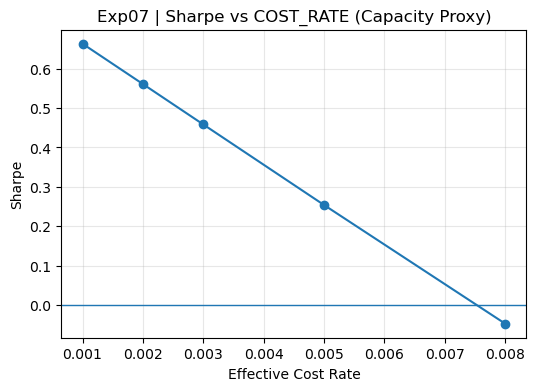

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(exp07["COST_RATE"], exp07["Sharpe"], marker="o")
ax.axhline(0, linewidth=1)
ax.set_title("Exp07 | Sharpe vs COST_RATE (Capacity Proxy)")
ax.set_xlabel("Effective Cost Rate")
ax.set_ylabel("Sharpe")
ax.grid(True, alpha=0.3)
plt.show()
